In [1]:
import pandas as pd
import numpy as np

crml = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold20220101_20231231_filled.csv", low_memory = False)
crml01 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202401_filled.csv", low_memory = False)
crml02 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202402_filled.csv", low_memory = False)
crml03 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202403_filled.csv", low_memory = False)
crml04 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202404_filled.csv", low_memory = False)
crml05 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202405_filled.csv", low_memory = False)
crml06 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202406_filled.csv", low_memory = False)
crml07 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202407_filled.csv", low_memory = False)
crml08 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202408.csv", low_memory = False)
crml09 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202409.csv", low_memory = False)
#crml10 = pd.read_csv("/Applications/idx-exchange intern 2024/data file/CRMLSSold202410.csv", low_memory = False)


In [2]:
# Combine all datasets into a single DataFrame
crml = pd.concat([crml, crml01, crml02, crml03, crml04, crml05, crml06, crml07, crml08, crml09], ignore_index=True)

# Display the combined DataFrame shape
print("Combined dataset shape:", crml.shape)

# Save the combined dataset to a new file (optional)
crml.to_csv("/Applications/idx-exchange intern 2024/data file/Combined_CRML.csv", index=False)


Combined dataset shape: (794512, 82)


In [3]:
#focusing only on single-family residences
crml = crml[(crml['PropertyType'] == "Residential") &
            (crml['PropertySubType'] == "SingleFamilyResidence")]


In [4]:
#finding percentage of NaN for each column
nan_percentage = (crml.isna().sum() / len(crml)) * 100
nan_df = pd.DataFrame({
    'Column': nan_percentage.index,
    'NaN_Percentage': nan_percentage.values
})

nan_df

,Column,NaN_Percentage
0,Flooring,35.867192
1,ViewYN,15.579255
2,WaterfrontYN,99.954829
3,BasementYN,97.593845
4,PoolPrivateYN,11.671095
...,...,...
77,MiddleOrJuniorSchoolDistrict,100.000000
78,latfilled,5.638437
79,lonfilled,5.638437
80,BuyerAgentAOR,84.760133


###  Drop features


In [5]:
features_to_drop = [
     'OriginalListPrice', 'ListingKey', 'ListAgentEmail',
     'ListAgentFirstName', 'ListAgentLastName', 'Latitude', 'Longitude', 'UnparsedAddress',
     'ListAgentFullName', 'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName',
     'ListingKeyNumeric', 'BuyerOfficeName', 'BuyerOfficeAOR', 'PurchaseContractDate',
     'ContractStatusChangeDate', 'BuyerAgencyCompensationType', 'BuyerAgencyCompensation',
    'latfilled', 'lonfilled', 'StateOrProvince', 'StreetNumberNumeric','CountyOrParish','MlsStatus','ListOfficeName','PostalCode','ListingContractDate','ListingId',
    'MLSAreaMajor','PropertySubType','LotSizeSquareFeet','PropertyType','Stories'
 ]
crml = crml.drop(columns = features_to_drop)

crml.columns

Index(['Flooring', 'ViewYN', 'WaterfrontYN', 'BasementYN', 'PoolPrivateYN',
       'CloseDate', 'ClosePrice', 'LivingArea', 'ListPrice', 'DaysOnMarket',
       'CoListOfficeName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'FireplacesTotal', 'AssociationFeeFrequency', 'AboveGradeFinishedArea',
       'TaxAnnualAmount', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'LotSizeAcres', 'SubdivisionName',
       'YearBuilt', 'BathroomsTotalInteger', 'City', 'TaxYear',
       'BuildingAreaTotal', 'BedroomsTotal', 'ElementarySchoolDistrict',
       'CoBuyerAgentFirstName', 'BelowGradeFinishedArea', 'BusinessType',
       'CoveredSpaces', 'MiddleOrJuniorSchool', 'FireplaceYN', 'HighSchool',
       'Levels', 'LotSizeDimensions', 'LotSizeArea', 'MainLevelBedrooms',
       'NewConstructionYN', 'GarageSpaces', 'HighSchoolDistrict',
       'AssociationFee', 'MiddleOrJuniorSchoolDistrict', 'BuyerAgentAOR',
       'ListAgentAOR'],
      dtype='object')

In [6]:
# #list of columns to drop
# columns_to_drop = [
#     'ListingKey', 'ListAgentEmail', 'ListAgentFirstName', 'ListAgentLastName', 
#     'PropertyType', 'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName', 
#     'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName', 
#     'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName', 'Latitude',
#     'FireplacesTotal', 'AboveGradeFinishedArea', 'ListingKeyNumeric', 'Longitude',
#     'TaxAnnualAmount', 'MlsStatus', 'ElementarySchool', 'BuilderName', 'LotSizeSquareFeet',
#     'PropertySubType', 'SubdivisionName', 'BuyerOfficeAOR', 'PostalCode',
#     'BuyerAgencyCompensationType', 'StreetNumberNumeric', 'ListingId', 'CountyOrParish',
#     'SubdivisionName', 'BuyerAgencyCompensation', 'TaxYear', 'BuildingAreaTotal', 
#     'ContractStatusChangeDate', 'ElementarySchoolDistrict', 'CoBuyerAgentFirstName', 
#     'PurchaseContractDate', 'ListingContractDate', 'BelowGradeFinishedArea', 
#     'BusinessType', 'StateOrProvince', 'CoveredSpaces', 'MiddleOrJuniorSchool', 
#     'Stories', 'HighSchool', 'LotSizeDimensions', 'HighSchoolDistrict', 'LotSizeArea',
#     'AssociationFee', 'MiddleOrJuniorSchoolDistrict', 'latfilled', 'lonfilled', 
#     'WaterfrontYN', 'BasementYN', 'Flooring', 'AssociationFeeFrequency', 'ListPrice',
#     'MainLevelBedrooms', 'NewConstructionYN', 'DaysOnMarket', 'OriginalListPrice',
#     'UnparsedAddress', 'MLSAreaMajor', 'ParkingTotal', 'AttachedGarageYN', 'ViewYN'
# ]

# crml = crml.drop(columns = columns_to_drop)

# crml.columns

In [7]:
nan_percentage = (crml.isna().sum() / len(crml)) * 100
nan_df = pd.DataFrame({
    'Column': nan_percentage.index,
    'NaN_Percentage': nan_percentage.values
})

nan_df

,Column,NaN_Percentage
0,Flooring,35.867192
1,ViewYN,15.579255
2,WaterfrontYN,99.954829
3,BasementYN,97.593845
4,PoolPrivateYN,11.671095
5,CloseDate,0.000000
6,ClosePrice,0.001208
7,LivingArea,0.065945
8,ListPrice,0.000000
9,DaysOnMarket,0.000000


In [8]:
# Define a threshold for missing values (e.g., 10%)
threshold = 30

# Drop columns with missing value percentage above the threshold
columns_to_drop = nan_df[nan_df['NaN_Percentage'] > threshold]['Column']
crml_cleaned = crml.drop(columns=columns_to_drop, axis=1)

# Display the resulting DataFrame
crml_cleaned.head()
remaining_columns = crml_cleaned.columns.tolist()
remaining_columns

['ViewYN',
 'PoolPrivateYN',
 'CloseDate',
 'ClosePrice',
 'LivingArea',
 'ListPrice',
 'DaysOnMarket',
 'AttachedGarageYN',
 'ParkingTotal',
 'LotSizeAcres',
 'YearBuilt',
 'BathroomsTotalInteger',
 'City',
 'BedroomsTotal',
 'FireplaceYN',
 'Levels',
 'LotSizeArea',
 'NewConstructionYN',
 'GarageSpaces',
 'HighSchoolDistrict']

In [9]:
crml = crml_cleaned

In [10]:
#feature engineering the levels column
crml['Levels'] = crml['Levels'].fillna("").astype(str)
crml['Levels'] = crml['Levels'].apply(lambda x: x.split(',')[-1].strip())
crml['Levels'] = crml['Levels'].replace(r'^\s*$', np.nan, regex=True)
levels_counts = crml['Levels'].value_counts()
print(levels_counts)

Levels
One            220159
Two            121255
ThreeOrMore      7178
MultiSplit       5674
Name: count, dtype: int64


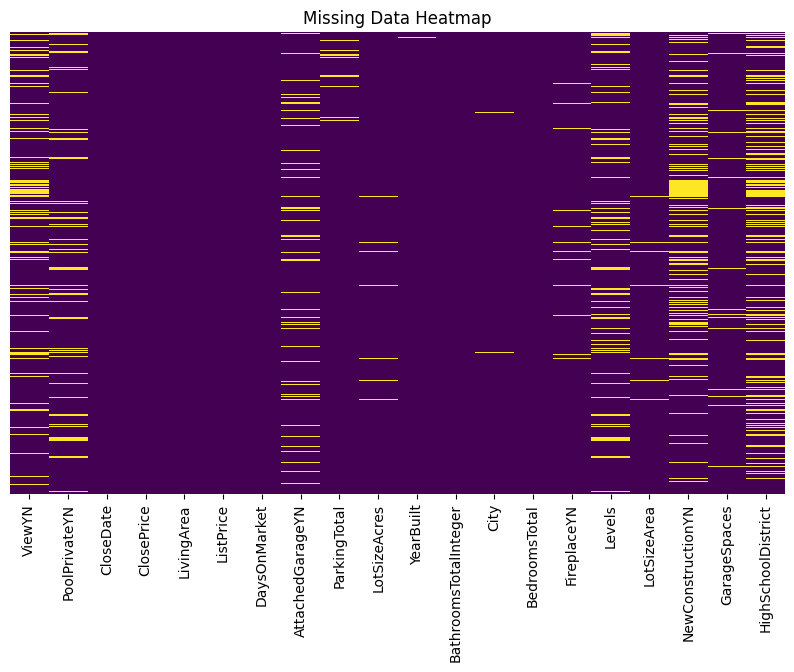

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(crml.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')

plt.yticks([], [])
plt.show()

In [12]:
#21.11% of rows dropped
crml_cleaned = crml.dropna()
print("original: ", crml.shape, "\ncleaned: ", crml_cleaned.shape)

original:  (413980, 20) 
cleaned:  (213745, 20)


In [13]:
#Converting type to datetime
crml_cleaned['CloseDate'] = pd.to_datetime(crml_cleaned['CloseDate'], format='%Y-%m-%d', errors='coerce')

/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/589502429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['CloseDate'] = pd.to_datetime(crml_cleaned['CloseDate'], format='%Y-%m-%d', errors='coerce')


In [14]:
# creat new feature
crml_cleaned['Premium'] = crml_cleaned['ClosePrice']-crml_cleaned['ListPrice']
crml_cleaned['Premium']  = crml_cleaned['Premium'].astype(int)

/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/3223720074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['Premium'] = crml_cleaned['ClosePrice']-crml_cleaned['ListPrice']
/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/3223720074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['Premium']  = crml_cleaned['Premium'].astype(int)


In [15]:
#Converting type to datetime
crml_cleaned['YearBuilt'] = crml_cleaned['YearBuilt'].astype(int)
crml_cleaned['YearBuilt'] = pd.to_datetime(crml_cleaned['YearBuilt'], format='%Y', errors='coerce')

/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/2023215788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['YearBuilt'] = crml_cleaned['YearBuilt'].astype(int)
/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/2023215788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['YearBuilt'] = pd.to_datetime(crml_cleaned['YearBuilt'], format='%Y', errors='coerce')


In [16]:
crml_cleaned['BuildingAge'] = crml_cleaned['CloseDate'].dt.year - crml_cleaned['YearBuilt'].dt.year
crml_cleaned.drop(columns = 'YearBuilt', inplace = True)

/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/3610219892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['BuildingAge'] = crml_cleaned['CloseDate'].dt.year - crml_cleaned['YearBuilt'].dt.year
/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/3610219892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned.drop(columns = 'YearBuilt', inplace = True)


count    2.137450e+05
mean     9.735455e+05
std      1.041347e+06
min      1.600000e+04
25%      5.375050e+05
50%      7.500000e+05
75%      1.077000e+06
max      1.780000e+08
Name: ClosePrice, dtype: float64


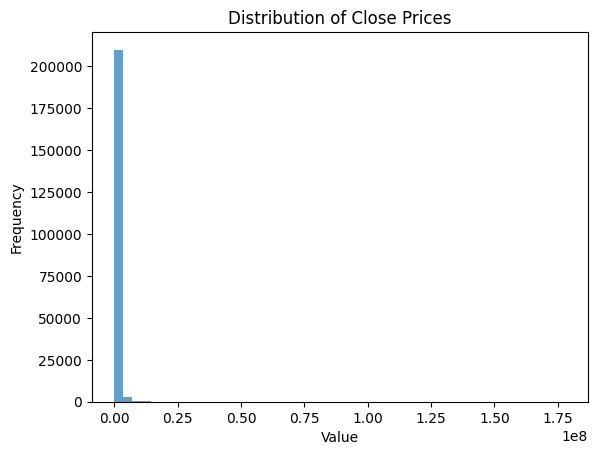

In [17]:
#Very skewed left with outliers to the right
print(crml_cleaned['ClosePrice'].describe())

plt.hist(crml_cleaned['ClosePrice'], bins=50, alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [18]:
crml_cleaned['ClosePrice_Log'] = np.log1p(crml_cleaned['ClosePrice'])

/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/3206828551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['ClosePrice_Log'] = np.log1p(crml_cleaned['ClosePrice'])


count    213745.000000
mean         13.580131
std           0.585139
min           9.680406
25%          13.194695
50%          13.527830
75%          13.889691
max          18.997294
Name: ClosePrice_Log, dtype: float64


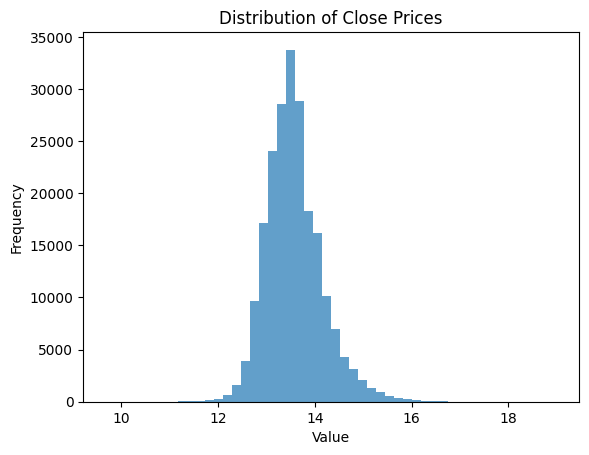

In [19]:
print(crml_cleaned['ClosePrice_Log'].describe())

plt.hist(crml_cleaned['ClosePrice_Log'], bins=50, alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [20]:
crml_cleaned['ViewYN'] = crml_cleaned['ViewYN'].astype(int)
crml_cleaned['AttachedGarageYN'] = crml_cleaned['AttachedGarageYN'].astype(int)
crml_cleaned['PoolPrivateYN'] = crml_cleaned['PoolPrivateYN'].astype(int)
crml_cleaned['NewConstructionYN'] = crml_cleaned['NewConstructionYN'].astype(int)
crml_cleaned['FireplaceYN'] = crml_cleaned['FireplaceYN'].astype(int)
crml_cleaned['LivingArea'] = crml_cleaned['LivingArea'].astype(int)
crml_cleaned['BathroomsTotalInteger'] = crml_cleaned['BathroomsTotalInteger'].astype(int)
crml_cleaned['GarageSpaces'] = crml_cleaned['GarageSpaces'].astype(int)

/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/1497447863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['ViewYN'] = crml_cleaned['ViewYN'].astype(int)
/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/1497447863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['AttachedGarageYN'] = crml_cleaned['AttachedGarageYN'].astype(int)
/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/1497447863.py:3: SettingWithCopyWarning: 
A value i

In [21]:
#Display the data types of all columns
print(crml_cleaned.dtypes)

ViewYN                            int64
PoolPrivateYN                     int64
CloseDate                datetime64[ns]
ClosePrice                      float64
LivingArea                        int64
ListPrice                       float64
DaysOnMarket                      int64
AttachedGarageYN                  int64
ParkingTotal                    float64
LotSizeAcres                    float64
BathroomsTotalInteger             int64
City                             object
BedroomsTotal                   float64
FireplaceYN                       int64
Levels                           object
LotSizeArea                     float64
NewConstructionYN                 int64
GarageSpaces                      int64
HighSchoolDistrict               object
Premium                           int64
BuildingAge                       int32
ClosePrice_Log                  float64
dtype: object


# Categorical Variables

In [22]:
#One-hot encoding the 'Levels' column
crml_cleaned = pd.get_dummies(crml_cleaned, columns=['Levels'])

level_columns = ['Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two']
crml_cleaned[level_columns] = crml_cleaned[level_columns].astype(int)

In [23]:
crml_cleaned.head()

,ViewYN,PoolPrivateYN,CloseDate,ClosePrice,LivingArea,ListPrice,DaysOnMarket,AttachedGarageYN,ParkingTotal,LotSizeAcres,...,NewConstructionYN,GarageSpaces,HighSchoolDistrict,Premium,BuildingAge,ClosePrice_Log,Levels_MultiSplit,Levels_One,Levels_ThreeOrMore,Levels_Two
6,1,0,2022-01-10,640000.0,2070,565000.0,13,1,1.0,0.0780,...,0,1,Rim of the World,75000,15,13.369225,0,0,1,0
7,0,0,2022-03-23,438000.0,1174,349999.0,3,1,2.0,0.2273,...,0,2,Fontana Unified,88001,62,12.989976,0,1,0,0
14,1,0,2022-01-19,399990.0,1422,399990.0,63,1,2.0,0.2800,...,1,2,Paradise Unified,0,1,12.899197,0,1,0,0
39,1,0,2022-01-14,925000.0,1000,949999.0,59,0,5.0,0.1171,...,0,1,Orange Unified,-24999,107,13.737550,0,1,0,0
44,0,1,2022-01-04,2000000.0,4043,2280000.0,34,1,2.0,0.4548,...,0,2,Arcadia Unified,-280000,64,14.508658,0,1,0,0


# Standardization

In [24]:
crml_cleaned

,ViewYN,PoolPrivateYN,CloseDate,ClosePrice,LivingArea,ListPrice,DaysOnMarket,AttachedGarageYN,ParkingTotal,LotSizeAcres,...,NewConstructionYN,GarageSpaces,HighSchoolDistrict,Premium,BuildingAge,ClosePrice_Log,Levels_MultiSplit,Levels_One,Levels_ThreeOrMore,Levels_Two
6,1,0,2022-01-10,640000.0,2070,565000.0,13,1,1.0,0.0780,...,0,1,Rim of the World,75000,15,13.369225,0,0,1,0
7,0,0,2022-03-23,438000.0,1174,349999.0,3,1,2.0,0.2273,...,0,2,Fontana Unified,88001,62,12.989976,0,1,0,0
14,1,0,2022-01-19,399990.0,1422,399990.0,63,1,2.0,0.2800,...,1,2,Paradise Unified,0,1,12.899197,0,1,0,0
39,1,0,2022-01-14,925000.0,1000,949999.0,59,0,5.0,0.1171,...,0,1,Orange Unified,-24999,107,13.737550,0,1,0,0
44,0,1,2022-01-04,2000000.0,4043,2280000.0,34,1,2.0,0.4548,...,0,2,Arcadia Unified,-280000,64,14.508658,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794463,1,0,2024-09-20,325000.0,1517,339000.0,345,1,2.0,0.2983,...,0,2,Middletown Unified,-14000,36,12.691584,0,1,0,0
794465,0,0,2024-09-03,745000.0,1143,720000.0,-56,1,2.0,0.1711,...,0,2,Orange Unified,25000,59,13.521141,0,1,0,0
794467,1,0,2024-09-05,150000.0,688,165000.0,511,0,1.0,5.0000,...,0,1,Morongo Unified,-15000,65,11.918397,0,1,0,0
794490,0,0,2024-09-23,1100000.0,1596,1300000.0,154,0,2.0,0.1558,...,0,2,Los Angeles Unified,-200000,104,13.910822,0,1,0,0


In [25]:
crml_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213745 entries, 6 to 794509
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ViewYN                 213745 non-null  int64         
 1   PoolPrivateYN          213745 non-null  int64         
 2   CloseDate              213745 non-null  datetime64[ns]
 3   ClosePrice             213745 non-null  float64       
 4   LivingArea             213745 non-null  int64         
 5   ListPrice              213745 non-null  float64       
 6   DaysOnMarket           213745 non-null  int64         
 7   AttachedGarageYN       213745 non-null  int64         
 8   ParkingTotal           213745 non-null  float64       
 9   LotSizeAcres           213745 non-null  float64       
 10  BathroomsTotalInteger  213745 non-null  int64         
 11  City                   213745 non-null  object        
 12  BedroomsTotal          213745 non-null  float64  

In [26]:
#Log transforming then min-max scaling
from sklearn.preprocessing import MinMaxScaler

crml_cleaned['LivingArea_Log'] = np.log1p(crml_cleaned['LivingArea'])

scaler = MinMaxScaler()
crml_cleaned['LivingArea_Log_Scaled'] = scaler.fit_transform(crml_cleaned[['LivingArea_Log']])

print(crml_cleaned[['LivingArea', 'LivingArea_Log', 'LivingArea_Log_Scaled']])

        LivingArea  LivingArea_Log  LivingArea_Log_Scaled
6             2070        7.635787               0.541863
7             1174        7.069023               0.440194
14            1422        7.260523               0.474546
39            1000        6.908755               0.411444
44            4043        8.304990               0.661908
...            ...             ...                    ...
794463        1517        7.325149               0.486139
794465        1143        7.042286               0.435397
794467         688        6.535241               0.344441
794490        1596        7.375882               0.495240
794509        2195        7.694393               0.552376

[213745 rows x 3 columns]


In [27]:

crml_cleaned['ListPrice_Log'] = np.log1p(crml_cleaned['ListPrice'])

scaler = MinMaxScaler()
crml_cleaned['ListPrice_Log_Scaled'] = scaler.fit_transform(crml_cleaned[['ListPrice_Log']])

print(crml_cleaned[['ListPrice', 'ListPrice_Log', 'ListPrice_Log_Scaled']])

        ListPrice  ListPrice_Log  ListPrice_Log_Scaled
6        565000.0      13.244583              0.615149
7        349999.0      12.765688              0.573849
14       399990.0      12.899197              0.585363
39       949999.0      13.764217              0.659961
44      2280000.0      14.639686              0.735460
...           ...            ...                   ...
794463   339000.0      12.733758              0.571096
794465   720000.0      13.487008              0.636055
794467   165000.0      12.013707              0.509000
794490  1300000.0      14.077876              0.687010
794509   412500.0      12.929994              0.588019

[213745 rows x 3 columns]


In [28]:
crml_cleaned['LotSizeAcres_Log'] = np.log1p(crml_cleaned['LotSizeAcres'])

scaler = MinMaxScaler()
crml_cleaned['LotSizeAcres_Log_Scaled'] = scaler.fit_transform(crml_cleaned[['LotSizeAcres_Log']])

print(crml_cleaned[['LotSizeAcres', 'LotSizeAcres_Log', 'LotSizeAcres_Log_Scaled']])

        LotSizeAcres  LotSizeAcres_Log  LotSizeAcres_Log_Scaled
6             0.0780          0.075107                 0.005577
7             0.2273          0.204817                 0.015209
14            0.2800          0.246860                 0.018331
39            0.1171          0.110736                 0.008223
44            0.4548          0.374868                 0.027836
...              ...               ...                      ...
794463        0.2983          0.261056                 0.019385
794465        0.1711          0.157943                 0.011728
794467        5.0000          1.791759                 0.133047
794490        0.1558          0.144793                 0.010752
794509        0.2537          0.226099                 0.016789

[213745 rows x 3 columns]


In [29]:
#Removing errors
crml_cleaned['ParkingTotal'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['ParkingTotal'] <= 20]

In [30]:
#Applying standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

crml_cleaned['Parking_Scaled'] = scaler.fit_transform(crml_cleaned[['ParkingTotal']])

print(crml_cleaned[['ParkingTotal', 'Parking_Scaled']])

        ParkingTotal  Parking_Scaled
6                1.0       -1.057489
7                2.0       -0.416711
14               2.0       -0.416711
39               5.0        1.505620
44               2.0       -0.416711
...              ...             ...
794463           2.0       -0.416711
794465           2.0       -0.416711
794467           1.0       -1.057489
794490           2.0       -0.416711
794509           2.0       -0.416711

[213452 rows x 2 columns]


/var/folders/v_/l15pvqdj30l6kqvnkxm4rtnh0000gn/T/ipykernel_36332/3199947927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crml_cleaned['Parking_Scaled'] = scaler.fit_transform(crml_cleaned[['ParkingTotal']])


In [31]:
#Removing errors
crml_cleaned['BedroomsTotal'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['BedroomsTotal'] <= 20]

In [32]:
#Applying standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

crml_cleaned['Bathrooms_Scaled'] = scaler.fit_transform(crml_cleaned[['BathroomsTotalInteger']])

print(crml_cleaned[['BathroomsTotalInteger', 'Bathrooms_Scaled']])

        BathroomsTotalInteger  Bathrooms_Scaled
6                           3          0.418716
7                           2         -0.568198
14                          2         -0.568198
39                          2         -0.568198
44                          5          2.392542
...                       ...               ...
794463                      2         -0.568198
794465                      2         -0.568198
794467                      1         -1.555111
794490                      2         -0.568198
794509                      3          0.418716

[213450 rows x 2 columns]


In [33]:
crml_cleaned['BathroomsTotalInteger'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['BathroomsTotalInteger'] <= 15]

In [34]:
scaler = StandardScaler()

crml_cleaned['Bedrooms_Scaled'] = scaler.fit_transform(crml_cleaned[['BedroomsTotal']])

print(crml_cleaned[['BedroomsTotal', 'Bedrooms_Scaled']])

        BedroomsTotal  Bedrooms_Scaled
6                 3.0        -0.561801
7                 3.0        -0.561801
14                3.0        -0.561801
39                2.0        -1.669309
44                5.0         1.653213
...               ...              ...
794463            3.0        -0.561801
794465            3.0        -0.561801
794467            1.0        -2.776816
794490            4.0         0.545706
794509            4.0         0.545706

[213446 rows x 2 columns]


In [35]:
crml_cleaned['GarageSpaces'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['GarageSpaces'] <= 20]

In [36]:
scaler = StandardScaler()

crml_cleaned['GarageSpaces_Scaled'] = scaler.fit_transform(crml_cleaned[['GarageSpaces']])

print(crml_cleaned[['GarageSpaces', 'GarageSpaces_Scaled']])

        GarageSpaces  GarageSpaces_Scaled
6                  1            -1.663585
7                  2            -0.249972
14                 2            -0.249972
39                 1            -1.663585
44                 2            -0.249972
...              ...                  ...
794463             2            -0.249972
794465             2            -0.249972
794467             1            -1.663585
794490             2            -0.249972
794509             2            -0.249972

[213446 rows x 2 columns]


In [37]:
crml_cleaned['BuildingAge'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['BuildingAge'] >= 0]

In [38]:
scaler = StandardScaler()

crml_cleaned['BuildingAge_Scaled'] = scaler.fit_transform(crml_cleaned[['BuildingAge']])

print(crml_cleaned[['BuildingAge', 'BuildingAge_Scaled']])

        BuildingAge  BuildingAge_Scaled
6                15           -1.109769
7                62            0.742606
14                1           -1.661540
39              107            2.516156
44               64            0.821430
...             ...                 ...
794463           36           -0.282112
794465           59            0.624369
794467           65            0.860842
794490          104            2.397919
794509           62            0.742606

[213432 rows x 2 columns]


In [39]:
crml_cleaned['DaysOnMarket'].unique()
crml_cleaned = crml_cleaned[crml_cleaned['DaysOnMarket'] >= 0]

In [40]:
scaler = StandardScaler()

crml_cleaned['DaysOnMarket_scaled'] = scaler.fit_transform(crml_cleaned[['DaysOnMarket']])

print(crml_cleaned[['DaysOnMarket', 'DaysOnMarket_scaled']])

        DaysOnMarket  DaysOnMarket_scaled
6                 13            -0.376896
7                  3            -0.610475
14                63             0.790999
39                59             0.697567
44                34             0.113620
...              ...                  ...
794450           431             9.386703
794463           345             7.377924
794467           511            11.255335
794490           154             2.916567
794509             5            -0.563759

[213375 rows x 2 columns]


In [41]:
scaler = StandardScaler()

crml_cleaned['Premium_scaled'] = scaler.fit_transform(crml_cleaned[['Premium']])

print(crml_cleaned[['Premium', 'Premium_scaled']])

        Premium  Premium_scaled
6         75000        0.173186
7         88001        0.204746
14            0       -0.008876
39       -24999       -0.069561
44      -280000       -0.688576
...         ...             ...
794450  -329000       -0.807523
794463   -14000       -0.042861
794467   -15000       -0.045289
794490  -200000       -0.494376
794509    47500        0.106430

[213375 rows x 2 columns]


In [42]:
#Finally, min-max scale close price
scaler = MinMaxScaler()
crml_cleaned['ClosePrice_Log_Scaled'] = scaler.fit_transform(crml_cleaned[['ClosePrice_Log']])

print(crml_cleaned[['ClosePrice', 'ClosePrice_Log', 'ClosePrice_Log_Scaled']])

        ClosePrice  ClosePrice_Log  ClosePrice_Log_Scaled
6         640000.0       13.369225               0.395928
7         438000.0       12.989976               0.355223
14        399990.0       12.899197               0.345479
39        925000.0       13.737550               0.435461
44       2000000.0       14.508658               0.518226
...            ...             ...                    ...
794450   1020000.0       13.835314               0.445954
794463    325000.0       12.691584               0.323196
794467    150000.0       11.918397               0.240208
794490   1100000.0       13.910822               0.454059
794509    460000.0       13.038984               0.360483

[213375 rows x 3 columns]


In [43]:
crml_cleaned.columns

Index(['ViewYN', 'PoolPrivateYN', 'CloseDate', 'ClosePrice', 'LivingArea',
       'ListPrice', 'DaysOnMarket', 'AttachedGarageYN', 'ParkingTotal',
       'LotSizeAcres', 'BathroomsTotalInteger', 'City', 'BedroomsTotal',
       'FireplaceYN', 'LotSizeArea', 'NewConstructionYN', 'GarageSpaces',
       'HighSchoolDistrict', 'Premium', 'BuildingAge', 'ClosePrice_Log',
       'Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two',
       'LivingArea_Log', 'LivingArea_Log_Scaled', 'ListPrice_Log',
       'ListPrice_Log_Scaled', 'LotSizeAcres_Log', 'LotSizeAcres_Log_Scaled',
       'Parking_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled',
       'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'DaysOnMarket_scaled',
       'Premium_scaled', 'ClosePrice_Log_Scaled'],
      dtype='object')

In [44]:
# Identify numeric columns in the dataset
numeric_columns = crml_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the numeric columns
print("Numeric Columns:", numeric_columns)


Numeric Columns: ['ViewYN', 'PoolPrivateYN', 'ClosePrice', 'LivingArea', 'ListPrice', 'DaysOnMarket', 'AttachedGarageYN', 'ParkingTotal', 'LotSizeAcres', 'BathroomsTotalInteger', 'BedroomsTotal', 'FireplaceYN', 'LotSizeArea', 'NewConstructionYN', 'GarageSpaces', 'Premium', 'ClosePrice_Log', 'Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two', 'LivingArea_Log', 'LivingArea_Log_Scaled', 'ListPrice_Log', 'ListPrice_Log_Scaled', 'LotSizeAcres_Log', 'LotSizeAcres_Log_Scaled', 'Parking_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'DaysOnMarket_scaled', 'Premium_scaled', 'ClosePrice_Log_Scaled']


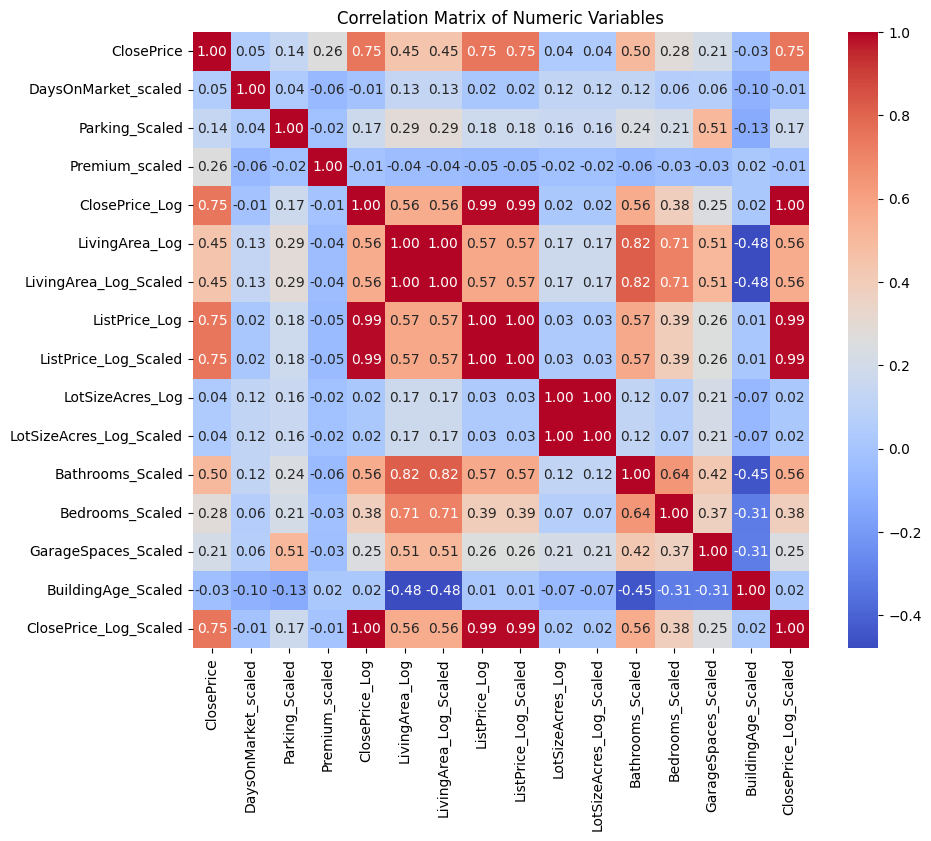

In [45]:
#numeric_columns = [
#    'ClosePrice', 'LivingArea_Log_Scaled', 'ListPrice_Log_Scaled','DaysOnMarket', 'LotSizeAcres_Log_Scaled',
#    'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'ClosePrice_Log_Scaled'
#]
numeric_columns= [
                'ClosePrice', 'DaysOnMarket_scaled',  'Parking_Scaled', 'Premium_scaled', 'ClosePrice_Log', 'LivingArea_Log', 'LivingArea_Log_Scaled', 'ListPrice_Log', 
                  'ListPrice_Log_Scaled', 'LotSizeAcres_Log', 'LotSizeAcres_Log_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'ClosePrice_Log_Scaled']
correlation_matrix = crml_cleaned[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [46]:
#Sort by close date before creating sequences
crml_cleaned = crml_cleaned.sort_values('CloseDate')

In [47]:
#City as embedding layer
crml_cleaned['City_Code'] = crml_cleaned['City'].astype('category').cat.codes

In [48]:
#City as embedding layer
crml_cleaned['HighSchoolDistrict_Code'] = crml_cleaned['HighSchoolDistrict'].astype('category').cat.codes

In [49]:
crml_cleaned.columns

Index(['ViewYN', 'PoolPrivateYN', 'CloseDate', 'ClosePrice', 'LivingArea',
       'ListPrice', 'DaysOnMarket', 'AttachedGarageYN', 'ParkingTotal',
       'LotSizeAcres', 'BathroomsTotalInteger', 'City', 'BedroomsTotal',
       'FireplaceYN', 'LotSizeArea', 'NewConstructionYN', 'GarageSpaces',
       'HighSchoolDistrict', 'Premium', 'BuildingAge', 'ClosePrice_Log',
       'Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two',
       'LivingArea_Log', 'LivingArea_Log_Scaled', 'ListPrice_Log',
       'ListPrice_Log_Scaled', 'LotSizeAcres_Log', 'LotSizeAcres_Log_Scaled',
       'Parking_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled',
       'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'DaysOnMarket_scaled',
       'Premium_scaled', 'ClosePrice_Log_Scaled', 'City_Code',
       'HighSchoolDistrict_Code'],
      dtype='object')

In [50]:
select_features = [
    'ViewYN','PoolPrivateYN', 'FireplaceYN', 'City_Code','AttachedGarageYN','NewConstructionYN',  #Binary and embedded
    'Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two',  #One-hot encoded
    'LivingArea_Log_Scaled', 'LotSizeAcres_Log_Scaled', 'ListPrice_Log_Scaled', #Log-scaled numerical
    'Parking_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 'BuildingAge_Scaled', 'Premium_scaled',#Standard-scaled numerical,
    'ClosePrice_Log_Scaled' # target
]


# Selecting the specified features from the dataset
crml_selected = crml_cleaned[select_features]

# Display the resulting DataFrame
print(crml_selected.head())

        ViewYN  PoolPrivateYN  FireplaceYN  City_Code  AttachedGarageYN  \
582231       1              0            1        265                 1   
567086       0              0            1        273                 1   
575700       1              0            0         15                 1   
578672       0              0            1        173                 1   
572764       0              0            1        273                 1   

        NewConstructionYN  Levels_MultiSplit  Levels_One  Levels_ThreeOrMore  \
582231                  0                  0           0                   0   
567086                  0                  0           1                   0   
575700                  0                  0           1                   0   
578672                  0                  0           1                   0   
572764                  0                  0           1                   0   

        Levels_Two  LivingArea_Log_Scaled  LotSizeAcres_Log_Scaled  

# Multicolinearity Issue Checking

In [52]:

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [53]:
# Calculate correlation matrix
list_continuous_vars = [
    'LivingArea_Log_Scaled', 'LotSizeAcres_Log_Scaled',  #Log-scaled numerical
    'Parking_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 'BuildingAge_Scaled' #Standard-scaled numerical
]

correlation_matrix = crml_selected[list_continuous_vars].corr()

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = list_continuous_vars
vif_data["VIF"] = [variance_inflation_factor(crml_selected[list_continuous_vars].values, i) for i in range(len(list_continuous_vars))]

print("\nVariance Inflation Factors:")
display(vif_data)


Variance Inflation Factors:


,Variable,VIF
0,LivingArea_Log_Scaled,1.458134
1,LotSizeAcres_Log_Scaled,1.492264
2,Parking_Scaled,1.354723
3,Bathrooms_Scaled,2.012431
4,Bedrooms_Scaled,1.751405
5,GarageSpaces_Scaled,1.639623
6,BuildingAge_Scaled,1.281062


In [ ]:
crml_selected.head()
crml_selected.shape

AttributeError: 'DataFrame' object has no attribute 'display'

In [ ]:


# #Function for creating sequences
# def create_sequences(data, target, sequence_length):
#     X, y = [], []
#     for i in range(len(data) - sequence_length):
#         X.append(data[i:i + sequence_length])
#         y.append(target[i + sequence_length])
#     return np.array(X), np.array(y)

# #Extract features and target as numpy arrays
# data = crml_cleaned[features].values
# target_data = crml_cleaned[target].values

# sequence_length = 30

# X, y = create_sequences(data, target_data, sequence_length)



# city_input_data = X[:, :, 2]
# numerical_input_data = np.delete(X, 2, axis=2)

# print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

NameError: name 'features' is not defined

# Build Model

In [57]:
# Model evaluation and cross-validation
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Machine learning models
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [59]:
from sklearn.model_selection import train_test_split

# Prepare the features DataFrame and label Series
features_ClosePrice = [
    'ViewYN', 'PoolPrivateYN', 'FireplaceYN', 'City_Code', 'AttachedGarageYN', 'NewConstructionYN',  # Binary and embedded
    'Levels_MultiSplit', 'Levels_One', 'Levels_ThreeOrMore', 'Levels_Two',  # One-hot encoded
    'LivingArea_Log_Scaled', 'LotSizeAcres_Log_Scaled', 'ListPrice_Log_Scaled',  # Log-scaled numerical
    'Parking_Scaled', 'Bathrooms_Scaled', 'Bedrooms_Scaled', 'GarageSpaces_Scaled', 
    'BuildingAge_Scaled', 'Premium_scaled'  # Standard-scaled numerical
]

# Extract the features DataFrame and label
features = crml_selected[features_ClosePrice]
label = crml_selected['ClosePrice_Log_Scaled']

# Perform the train-test split
features_train_ClosePrice, features_test_ClosePrice, labels_train_ClosePrice, labels_test_ClosePrice = train_test_split(
    features, label, test_size=0.20, random_state=42
)

# Display the shapes of the resulting datasets
print("Training features shape:", features_train_ClosePrice.shape)
print("Test features shape:", features_test_ClosePrice.shape)
print("Training labels shape:", labels_train_ClosePrice.shape)
print("Test labels shape:", labels_test_ClosePrice.shape)


Training features shape: (170700, 19)
Test features shape: (42675, 19)
Training labels shape: (170700,)
Test labels shape: (42675,)


In [63]:
# Define a function to evaluate the models
def evaluate(model, X, y):
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    rmse = mean_squared_error(y, predictions, squared=False)  # RMSE
    return r2, mae, rmse

# Define the models
models = {
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

test_scores_ClosePrice = []
model_list_ClosePrice = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(features_train_ClosePrice, labels_train_ClosePrice)
    test_r2, test_mae, test_rmse = evaluate(model, features_test_ClosePrice, labels_test_ClosePrice)
    test_scores_ClosePrice.append((round(test_r2, 4), round(test_mae, 4), round(test_rmse, 4)))
    model_list_ClosePrice.append(model_name)

# Create a DataFrame to store the results
df_result_ClosePrice = pd.DataFrame({
    'Test R2': [score[0] for score in test_scores_ClosePrice],
    'Test MAE': [score[1] for score in test_scores_ClosePrice],
    'Test RMSE': [score[2] for score in test_scores_ClosePrice]
}, index=model_list_ClosePrice)

# Display the results
df_result_ClosePrice

,Test R2,Test MAE,Test RMSE
KNN Regressor,0.8601,0.0154,0.0237
Random Forest,0.9983,0.0001,0.0026
XGBoost Regressor,0.9947,0.0010,0.0046


In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [5, 10, 15, 20, None],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None], # Number of features to consider at each split
    'bootstrap': [True, False]            # Whether to bootstrap samples
}

# Create a base model
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=1)

# Fit the grid search to the data and identify best hyperparameters
grid_search_rf.fit(features_train_ClosePrice, labels_train_ClosePrice)
best_params_rf = grid_search_rf.best_params_

# Display the best hyperparameters
print("Best hyperparameters for Random Forest Regressor (ClosePrice):", best_params_rf)

# Build the final model with the best hyperparameters and evaluate its performance
best_grid_rf = grid_search_rf.best_estimator_
grid_accuracy_rf = evaluate(best_grid_rf, features_test_ClosePrice, labels_test_ClosePrice)

# Print the evaluation metrics
print("Grid Search Random Forest Model Evaluation:", grid_accuracy_rf)


Fitting 3 folds for each of 810 candidates, totalling 2430 fits


In [ ]:
# Fit final model with best hyperparameters for Random Forest
rf_final_ClosePrice = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
rf_final_ClosePrice.fit(features_train_ClosePrice, labels_train_ClosePrice)

# Predict results on training and test data
rf_predict_result_final_train_ClosePrice = rf_final_ClosePrice.predict(features_train_ClosePrice)
rf_predict_result_final_test_ClosePrice = rf_final_ClosePrice.predict(features_test_ClosePrice)

# Calculate R2 scores
r2_train_rf_ClosePrice = r2_score(labels_train_ClosePrice, rf_predict_result_final_train_ClosePrice)
r2_test_rf_ClosePrice = r2_score(labels_test_ClosePrice, rf_predict_result_final_test_ClosePrice)

# Print R2 scores
print("Final Random Forest Regressor training R2-score =", round(r2_train_rf_ClosePrice, 3))
print("Final Random Forest Regressor validation R2-score =", round(r2_test_rf_ClosePrice, 3))

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate

# # Input for the categorical City feature (embedding)
# city_input = Input(shape=(sequence_length,), name='City_Input')
# city_embedding = Embedding(input_dim=1055, output_dim=32)(city_input)

# # Input for numerical and binary features
# num_input = Input(shape=(sequence_length, len(features) - 1), name='Numerical_Input')

# # Combine all features
# x = Concatenate(axis=-1)([city_embedding, num_input])

# # Add LSTM layers
# x = LSTM(64, return_sequences=True)(x)
# x = LSTM(32)(x)

# # Output layer for regression
# output = Dense(1, activation='linear', name='Output')(x)

# # Build and compile the model
# model = Model(inputs=[city_input, num_input], outputs=output)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Print the model summary
# model.summary()

In [ ]:
# # Train the model
# history = model.fit(
#     [city_input_data, numerical_input_data],
#     y,
#     validation_split=0.2,
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

In [ ]:
# # Evaluate the model
# loss, mae = model.evaluate([city_input_test, numerical_input_test], y_test, verbose=1)
# print(f"Test Loss: {loss}, Test MAE: {mae}")

# # Predict on test data
# y_pred = model.predict([city_input_test, numerical_input_test])

# # Reshape predictions and actual values if necessary
# y_pred = y_pred.flatten()  # Ensure predictions have the correct shape
# y_test = y_test.flatten()  # Ensure true values have the correct shape

# # Plot actual vs predicted
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Actual', marker='o', linestyle='-', alpha=0.7)
# plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', alpha=0.7)
# plt.legend()
# plt.title('Actual vs Predicted Housing Prices')
# plt.xlabel('Sample Index')
# plt.ylabel('Scaled ClosePrice')
# plt.show()